# Data Preparation Part 1 (10 pts)

Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Imported all the required packages for analysis

In [ ]:
## Load the dataset from our team's GitHub repository

url=(r'https://github.com/CivetWang/Machine-Learning/blob/main/cardio_train.csv?raw=true')
df_Cardio = pd.read_csv(url,sep=';',index_col=0)

Loaded the Heart Disease prediction dataset for analysis.

In [ ]:
## Print out the first 5 rows from our dataset to ensure we read it in correctly.

df_Cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Missing Value Identification

In [ ]:
nanvalues = df_Cardio.isna().any()
print(nanvalues)

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool


The dataset has no na values.

In [ ]:
nullvalues = df_Cardio.isnull().any()
print(nullvalues)

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool


There are no missing values in this dataset.

## Feature Engineering

In [ ]:
# Create a new variable that is a copy of the full dataset.
df_Cardio_updated = df_Cardio.copy()

## Convert the age in days to Age in Years
df_Cardio_updated["Age_in_years"]= pd.to_numeric(df_Cardio_updated["age"]/365)

## converted the Age_in_years to integer from float64
df_Cardio_updated["Age_in_years"]= df_Cardio_updated["Age_in_years"].astype(int)

## Deleted the age column as it is no longer needed
del df_Cardio_updated['age']

## Updated the column names for better readability
df_Cardio_updated.rename(columns={'alco': 'Alcoholic', 'cardio': 'Heart_Disease','ap_hi':'Systolic','ap_lo':'Diastolic','Smoking':'Smoker','gluc':'glucose'}, inplace=True)

## Created a new feature named BMI by combining Height and Weight
df_Cardio_updated['BMI']=pd.to_numeric(df_Cardio_updated['weight'])/((pd.to_numeric(df_Cardio_updated["height"]/100))**2)

## converted BMI to integer
df_Cardio_updated['BMI']=df_Cardio_updated['BMI'].astype(int)


## Update Gender to 0(Female), and 1(Male)
df_Cardio_updated["gender"]=df_Cardio_updated["gender"].replace((1, 2),('0', '1'))

## converted Gender to integer
df_Cardio_updated['gender']= df_Cardio_updated['gender'].astype(int)


In [ ]:
df_Cardio_updated.head()

,gender,height,weight,Systolic,Diastolic,cholesterol,glucose,smoke,Alcoholic,active,Heart_Disease,Age_in_years,BMI
id,,,,,,,,,,,,,
0,1,168,62.0,110,80,1,1,0,0,1,0,50,21
1,0,156,85.0,140,90,3,1,0,0,1,1,55,34
2,0,165,64.0,130,70,3,1,0,0,0,1,51,23
3,1,169,82.0,150,100,1,1,0,0,1,1,48,28
4,0,156,56.0,100,60,1,1,0,0,0,0,47,23


## One Hot Encoding

In [ ]:
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# One Hot Encode the Cholesterol feature. 
le = LabelEncoder()
df_Cardio_updated ['cholesterol'] = le.fit_transform(df_Cardio_updated ['cholesterol'])

df_Cardio_updated =pd.get_dummies(df_Cardio_updated, columns = ['cholesterol'])

## Print out dataframe to see the column conversion
df_Cardio_updated

,gender,height,weight,Systolic,Diastolic,glucose,smoke,Alcoholic,active,Heart_Disease,Age_in_years,BMI,cholesterol_0,cholesterol_1,cholesterol_2
id,,,,,,,,,,,,,,,
0,1,168,62.0,110,80,1,0,0,1,0,50,21,1,0,0
1,0,156,85.0,140,90,1,0,0,1,1,55,34,0,0,1
2,0,165,64.0,130,70,1,0,0,0,1,51,23,0,0,1
3,1,169,82.0,150,100,1,0,0,1,1,48,28,1,0,0
4,0,156,56.0,100,60,1,0,0,0,0,47,23,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,1,168,76.0,120,80,1,1,0,1,0,52,26,1,0,0
99995,0,158,126.0,140,90,2,0,0,1,1,61,50,0,1,0
99996,1,183,105.0,180,90,1,0,1,0,1,52,31,0,0,1


## Outlier Detection

In [ ]:
# Remove outlier data
df_Cardio_updated = df_Cardio_updated.loc[(df_Cardio_updated["Diastolic"]<190)&(df_Cardio_updated["Diastolic"]>60)&(df_Cardio_updated["Systolic"]>40)&(df_Cardio_updated["Systolic"]<240)&
                                          (df_Cardio_updated["BMI"]>12)&(df_Cardio_updated["BMI"]<50)]

In [ ]:
df_Cardio_updated.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,65696.0,0.353735,0.478132,0.0,0.0,0.0,1.0,1.0
height,65696.0,164.535299,7.852639,120.0,159.0,165.0,170.0,250.0
weight,65696.0,74.293102,13.891845,28.0,65.0,72.0,82.0,180.0
Systolic,65696.0,127.517733,16.091901,70.0,120.0,120.0,140.0,230.0
Diastolic,65696.0,82.293260,8.691581,61.0,80.0,80.0,90.0,182.0
glucose,65696.0,1.228035,0.574740,1.0,1.0,1.0,1.0,3.0
smoke,65696.0,0.088483,0.283999,0.0,0.0,0.0,0.0,1.0
Alcoholic,65696.0,0.054082,0.226182,0.0,0.0,0.0,0.0,1.0
active,65696.0,0.803367,0.397455,0.0,1.0,1.0,1.0,1.0
Heart_Disease,65696.0,0.505008,0.499979,0.0,0.0,1.0,1.0,1.0


After research about blood pressure range with respect to Diastolic and Systolic, the most extreme range of Systolic blood pressure for a Human Being is [40,240], and for Diastolic blood pressure is [60,190]. At the same time, based on similar logic, the team restricted the BMI range to [12,50].

## Overview

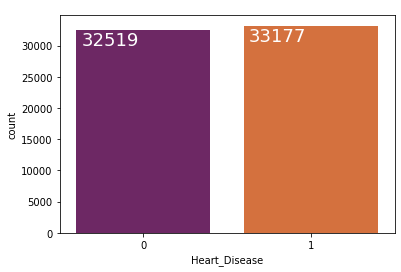

In [ ]:
# Create a Barchart to show the counts of Heart Disease Yes, and No.
ax = sns.countplot(x="Heart_Disease", data=df_Cardio_updated, palette="inferno")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+ 0.2, p.get_height()), ha='center', va='center', color='white', size=18)

Based on the above countplot, we see that we have roughly an equal amount of 0 and 1 class labels in our dataset. Therefore, our dataset is not imbalanced. We will factor this in when deciding on the Metrics to use for evaluating the Models.




### Correlation Plot

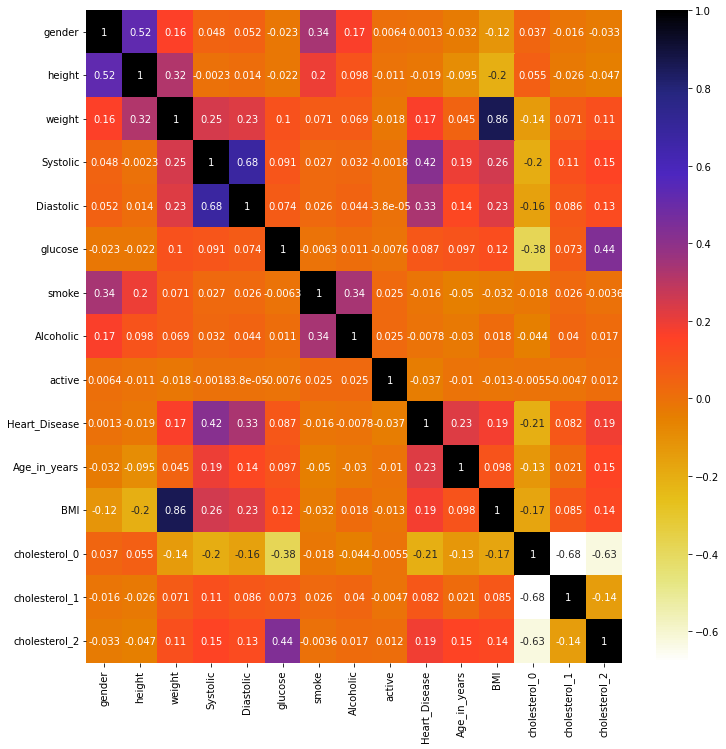

In [ ]:
# Let's view a correlation of the current features

plt.figure(figsize=(12,12))
sns.heatmap(df_Cardio_updated.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



The following are the significant correlations we spotted in the correlation plot above.

*   **BMI** and **Height** are strongly correlated
*   **BMI**  and **Weight** are strongly correlated
*   **Diastolic** and **Systolic** are highly correlated

Based on the above analysis, we'll remove the following features from the model to prevent colinearity.

*   Diastolic
*   Height
*   Weight 







# Data Preparation Part 2 (5 pts)

Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [ ]:
## Based on the correlation findings, we're dropping height, weight, and Diastolic from the dataset.
df_Cardio_updated=df_Cardio_updated.drop(['height','weight','Diastolic'], axis='columns')


## Statistics of the Features to be used in the Models.
df_Cardio_updated.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,65696.0,0.353735,0.478132,0.0,0.0,0.0,1.0,1.0
Systolic,65696.0,127.517733,16.091901,70.0,120.0,120.0,140.0,230.0
glucose,65696.0,1.228035,0.574740,1.0,1.0,1.0,1.0,3.0
smoke,65696.0,0.088483,0.283999,0.0,0.0,0.0,0.0,1.0
Alcoholic,65696.0,0.054082,0.226182,0.0,0.0,0.0,0.0,1.0
active,65696.0,0.803367,0.397455,0.0,1.0,1.0,1.0,1.0
Heart_Disease,65696.0,0.505008,0.499979,0.0,0.0,1.0,1.0,1.0
Age_in_years,65696.0,52.935354,6.736616,29.0,48.0,54.0,58.0,64.0
BMI,65696.0,26.984946,5.052431,13.0,23.0,26.0,30.0,49.0
cholesterol_0,65696.0,0.747702,0.434335,0.0,0.0,1.0,1.0,1.0


### Model Features:

*   Gender
*   Systolic
*   Glucose
*   Smoke
*   Alcoholic
*   Active
*   Age_in_years
*   BMI
*   Cholesterol_0
*   Cholesterol_1
*   Cholesterol_2

### Target Variable:

*   Heart_Disease




# Modeling and Evaluation 1 (10 pts)

*Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.*






### **Model Metrics**

Our data is divided equally amongst the two class labels of Heart_Disease (1 and 0). Therefore **Accuracy** would be a pretty reliable Metric. We'll use this metric to inform us of the overall accuracy of our models. That is, How often is our model correct at predicting the correct output. 

In addition, we will look at the **ROC, Recall and Precision**: 
*  **ROC & AUC** - Our reason for using this metric is so that we can evaluate the models fairly. The ROC is great Metric for model comparisons.

*  **Recall** - We'll use this metric as part of the model evaluation because we're interested in getting a low false negative rate. We are creating a model that'll determine whether or not someone has Heart Disease. This means we don't want to predict someone who has heart disease as negative. This will lead to false diagnosis and bad outcomes. Hence, we'll monitor this metric to ensure our model does well.  

* **Precision** - 




# Modeling and Evaluation 2 (10 pts)

*Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.*



**Cross Validation - K Fold**
* Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. Hold-out, on the other hand, is dependent on just one train-test split. That makes the hold-out method score dependent on how the data is split into train and test sets.
* The hold-out method is good to use when you have a very large dataset, you’re on a time crunch, or you are starting to build an initial model in your data science project. Keep in mind that because cross-validation uses multiple train-test splits, it takes more computational power and time to run than using the holdout method.

** We are using K fold

## Scaling and Splitting the variables into Training and Testing Dataset

In [ ]:
## X is the predictor variables used to predict the target variable Y.

X=df_Cardio_updated.drop('Heart_Disease',axis=1)
y=df_Cardio_updated['Heart_Disease']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = True, stratify = y)

## We have decided to use Stratified K fold 
kf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Modeling and Evaluation 3 (20 pts)

*Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!*

## Base Model Comparision 

In [ ]:
## Function to define the Metrics for the Training Models

def cross_validate_training(classifier, X, y):
  result = []
  cols = [ 'Cross Validation Accuracy', 'Cross Validation Precision','Cross Validation Recall', 'Cross Validation F1 Score', 'Cross Validation ROC_AUC']
  scoring = {'Accuracy': 'accuracy','precision': 'precision', 'Recall': 'recall', 'ROC_AUC': 'roc_auc', 'f1_score': 'f1'}
  crs_val = cross_validate(classifier, X, y, cv=kf, scoring = scoring)
  mean_accuracy = np.mean(crs_val['test_Accuracy'])
  mean_precision = np.mean(crs_val['test_precision'])
  mean_Recall = np.mean(crs_val['test_Recall'])
  mean_roc_auc = np.mean(crs_val['test_ROC_AUC'])
  mean_f1_score = np.mean(crs_val['test_f1_score'])
  result.extend([mean_accuracy, mean_precision, mean_Recall, mean_f1_score, mean_roc_auc ])
  series_result = pd.Series(data=result, index=cols)
  
  return series_result  

### Model without any Tuning

In [ ]:
## Below is the base models that we are going to run for this analysis.
from xgboost import XGBClassifier
clf_dict = {
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'Decision Tree' : DecisionTreeClassifier()
}

In [ ]:
%%time
model_eval = {}
for key in clf_dict:

    classifier_result = cross_validate_training(clf_dict[key], X_train, y_train)
    model_eval[key] = classifier_result
        
df_base_model = pd.DataFrame(model_eval)

CPU times: user 18.4 s, sys: 2.54 s, total: 20.9 s
Wall time: 18.7 s


In [ ]:
df_base_model

,XGBoost,Logistic Regression,Decision Tree
Cross Validation Accuracy,0.731572,0.725564,0.666301
Cross Validation Precision,0.751179,0.759013,0.702698
Cross Validation Recall,0.700679,0.669051,0.588033
Cross Validation F1 Score,0.725021,0.711168,0.640243
Cross Validation ROC_AUC,0.797956,0.788593,0.677220



### Parameter Tuning




In [ ]:
%%time
logreg = LogisticRegression()
parameters = [{'solver': [ 'liblinear','saga']},
              {'penalty':['l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]


grid_search_log_reg = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'recall',
                            return_train_score=True)
grid_search_log_reg.fit(X_train, y_train)
#logistic_cv_score_us = cross_val_score(grid_search_log_reg, X_train, y_train, scoring = 'recall', cv = kf)
# make predictions on the test data
#y_test_predict = grid_search_log_reg.best_estimator_.predict(X_test)
#logistic_recall_us = recall_score(y_test, y_test_predict)
#logistic_accuracy_us = accuracy_score(y_test, y_test_predict)


best_Estimator_lg = grid_search_log_reg.best_estimator_


CPU times: user 6.21 s, sys: 10.9 s, total: 17.1 s
Wall time: 4.72 s


In [ ]:
print(best_Estimator_lg)

LogisticRegression(C=0.001)


In [ ]:
%%time
decision_tree=DecisionTreeClassifier()
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
              "min_samples_leaf": list(range(5,10,1))}
#new_params = {'decisiontreeclassifier__' + key: tree_params[key] for key in tree_params}
#decision_tree = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='recall',
#                        return_train_score=True)
grid_imba_tree = GridSearchCV(decision_tree, param_grid=tree_params, cv=kf, return_train_score=True)

# fit the model
grid_imba_tree.fit(X_train, y_train);
#dtree_cv_score_us = cross_val_score(grid_imba_tree, X_train, y_train, scoring='recall', cv=kf)

# make predictions oon the test data
#y_test_predict = decision_tree.best_estimator_.named_steps['decisiontreeclassifier'].predict(X_test)
#dtree_recall_us = recall_score(y_test, y_test_predict)
#dtree_accuracy_us = accuracy_score(y_test, y_test_predict)

# print("Cross Validation Score for Decision Tree Classifier: " + str(udtree_cv_score.mean()))
# print("Recall Score for Decision Tree Classifier: " + str(udtree_recall))
tree_clf = grid_imba_tree.best_estimator_

CPU times: user 36.5 s, sys: 509 ms, total: 37 s
Wall time: 36.7 s


In [ ]:
print (tree_clf)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8)


In [ ]:
XGboost= XGBClassifier()
parameters = {
    'n_estimators': [100, 200], 
  'max_depth': [3, 5, 8] 
    }
model = GridSearchCV(XGboost, parameters, scoring="recall", cv = kf, n_jobs = -1, verbose = 2)

model.fit(X_train, y_train);

xg_boost = model.best_estimator_
        

Fitting 10 folds for each of 6 candidates, totalling 60 fits


In [ ]:
print(xg_boost)

XGBClassifier(max_depth=5, n_estimators=200)


In [ ]:
%%time
data_score = [['Logistic Regression', best_Estimator_lg], 
              ['XGboost', xg_boost],['Decision_Tree', tree_clf]
              ] 

# Create the dataframe 
data_table = pd.DataFrame(data_score, columns = ['Classifier', 'Best_estimator']) 
data_table

CPU times: user 932 µs, sys: 0 ns, total: 932 µs
Wall time: 940 µs


### Re-run Models with Tuned Parameters

In [ ]:
## Below is the base models that we are going to run for this analysis.
from xgboost import XGBClassifier
clf_dict = {
    'XGBoost': XGBClassifier(max_depth=5, n_estimators=200,random_state=13),
    'Logistic Regression' : LogisticRegression(C=0.001,random_state=13),
    'Decision Tree' : DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,random_state=13)
}

In [ ]:
%%time
model_eval = {}
for key in clf_dict:

    classifier_result = cross_validate_training(clf_dict[key], X_train, y_train)
    model_eval[key] = classifier_result
        
df_tuned_model = pd.DataFrame(model_eval)

CPU times: user 49.1 s, sys: 2.29 s, total: 51.4 s
Wall time: 48.6 s


In [ ]:
df_tuned_model

,XGBoost,Logistic Regression,Decision Tree
Cross Validation Accuracy,0.730821,0.723859,0.728629
Cross Validation Precision,0.748288,0.756258,0.744548
Cross Validation Recall,0.703853,0.668810,0.704456
Cross Validation F1 Score,0.725366,0.709821,0.723892
Cross Validation ROC_AUC,0.797448,0.788070,0.791851


# Modeling and Evaluation 4 (10 pts)

*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

## ROC & AUC Metric

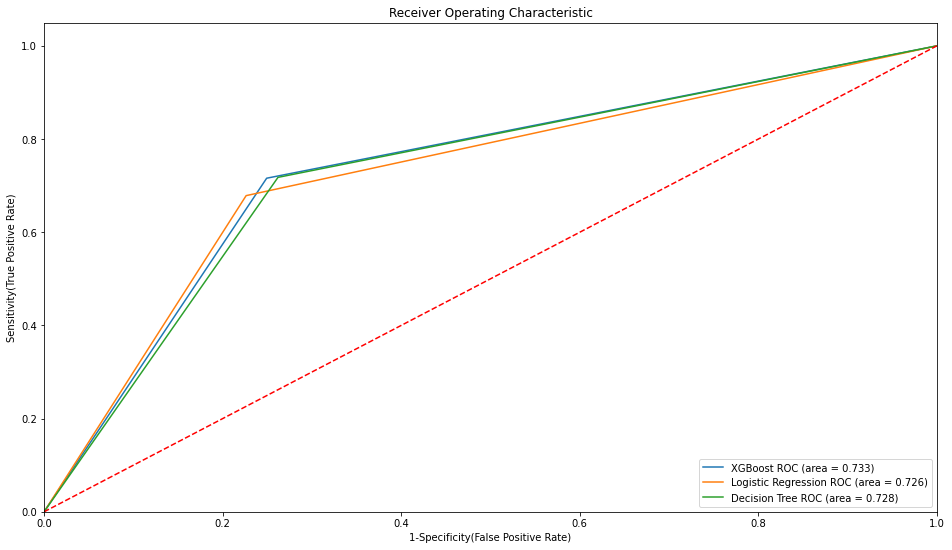

In [ ]:

def plot_multiplt_rocauc(train_X, train_y ,dev_X, dev_y):
    df_roc_metrics = pd.DataFrame(columns = ['models1','fpr', 'tpr', 'thresholds'])
    clf=['XGBoost','Logistic Regression','Decision Tree']
    plt.figure(figsize = (16,9))
    for m in clf:
        model = clf_dict[m]   
        model.fit(train_X, train_y)
        y_pred = model.predict(dev_X)
        #pred   = model.predict_proba(dev_X)
        #pred_new = [i[1] for i in pred]
        fpr, tpr, thresholds = roc_curve(dev_y, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m, roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    return

plot_multiplt_rocauc(X_train,y_train, X_test, y_test)

XGBClassifier(max_depth=5, n_estimators=200, random_state=13)


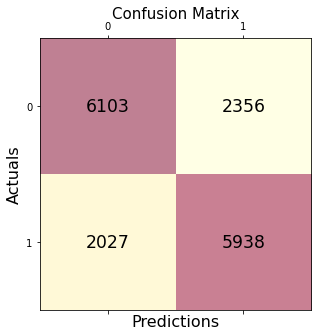

LogisticRegression(C=0.001, random_state=13)


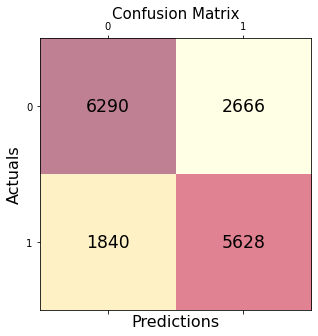

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=13)


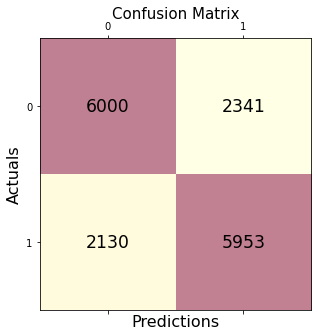

,XGBoost,Logistic Regression,Decision Tree
Precision,74.551161,75.361543,73.648398
Recall,71.593923,67.856282,71.774777
F1 Score,73.042623,71.412257,72.699518
Accuracy,73.313444,72.564540,72.777642
ROC_AUC,73.330787,72.612028,72.787757


In [ ]:
## Below is the method that would help us calculate the metrics with which we will evaluate the model. 
from sklearn.metrics import *
from sklearn.model_selection import cross_val_predict
def cal_score(y_test, y_pred): 
    #cm              = confusion_matrix(y_test, y_pred)
    precision_score1  = precision_score(y_test ,y_pred)*100
    recall_score1   = recall_score(y_test ,y_pred)*100
    f1_score1   = f1_score(y_test, y_pred)*100 
    accuracy =accuracy_score(y_test, y_pred)*100 
    roc_auc_score1=roc_auc_score(y_test,y_pred)*100
    return precision_score1,recall_score1,f1_score1,accuracy,roc_auc_score1

def metrics_calculation(classifier, training_data, testing_data, training_label, testing_label):
    
    result = []
    cols = [ 'Precision','Recall', 'F1 Score', 'Accuracy', 'ROC_AUC']
  
    classifier.fit(training_data, training_label)
    predictions = classifier.predict(testing_data)
    
    mat_con = (confusion_matrix(testing_label, predictions))

# Setting the attributes
    fig, px = plt.subplots(figsize=(5, 5))
    px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
    for m in range(mat_con.shape[0]):
      for n in range(mat_con.shape[1]):
          px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
    plt.xlabel('Predictions', fontsize=16)
    plt.ylabel('Actuals', fontsize=16)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()

    precision_score1,recall_score1,f1_score1,accuracy,roc_auc_score1= cal_score(testing_label, predictions)
    result.extend([ precision_score1,recall_score1,f1_score1,accuracy,roc_auc_score1])
    series_result = pd.Series(data=result, index=cols)
    
    return series_result

frame = {}
for key in clf_dict:
    print(clf_dict[key])
    classifier_result = metrics_calculation(clf_dict[key], X_train,X_test, y_train, y_test)
    frame[key]    = classifier_result
        
df_test_performance = pd.DataFrame(frame)
df_test_performance



*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

---
Our chosen Method of evaluation was to split the Training and Testing data at 75% & 25% respectively. Then, on the training data set, we used K-Fold Stratified Cross Validation to train and test our models. The following were the results from this method:

We used three Models: XGboost, Logistic Regression, and Decision Tree.
Overall we saw better performance from XGBoost:
*  Accuracy: 73%
*  Precision: 75%
*  Recall: 72%
*  ROC & AUC: 73%

The plot above shows an ROC & AUC plot. Basically, our interest is in the model (plotted by the lines) reducing the amount of area in the upper corner. Ideally we'd want this to be 1.0. However, as you may see, our best model(XGboost) produced a score of 73.3%.

# Modeling and Evaluation 5 (10 pts)

Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.

In [ ]:
## Below is the code that goives us the error rate of each on each of the fold. Here we have 10 folds.
def model_comparison(classifier, training_data, training_label):
    
   
    df = []
    df_error=[]
    crs_val = cross_val_score(classifier, training_data, training_label, cv=kf)
    acc = crs_val
    std_acc  = np.std(crs_val)
    df = pd.DataFrame(acc,columns =['Cross_Validation_Accuracy'])
    df_error=1-df['Cross_Validation_Accuracy']
    
    return df_error


model_eval = {}
for key in clf_dict:

    comparison_result1= model_comparison(clf_dict[key], X_train,  y_train)
    model_eval[key]    = comparison_result1
        
df_base_model1 = pd.DataFrame(model_eval)

df_base_model1


,XGBoost,Logistic Regression,Decision Tree
0,0.274756,0.278206,0.275568
1,0.260146,0.268060,0.264002
2,0.270956,0.278466,0.274000
3,0.270753,0.275015,0.271159
4,0.262026,0.271768,0.267303
5,0.272783,0.280292,0.278872
6,0.274812,0.280292,0.278060
7,0.282728,0.282322,0.280698
8,0.260605,0.271768,0.258575
9,0.262229,0.275218,0.265476


In [ ]:
from math import sqrt
from scipy import stats
import scipy.stats
import itertools
from itertools import permutations

# Below is the ststistical model compare we have used to get the confidence interval with alpha=95%

def statistical_model_compare(model1,model2,df,dof):
  
  model_compare=df[[model1,model2]].copy()
  confidence = 0.95
  t_crit = np.abs(scipy.stats.t.ppf((1-confidence)/2,dof))
  model_compare ['Diff']=df[model1]-df[model2]
  mean_diff=np.mean(model_compare['Diff'])
  model_compare['Difference']=model_compare['Diff']-mean_diff
  J=abs(np.sum(model_compare['Difference'])/dof)
  
  variance=sqrt(J)
  #variance=np.std(np.sum(model_compare ['Diff']))
  Conf_upper=round((mean_diff+((1/sqrt(10))*t_crit*variance)),9)
  Conf_lower=round((mean_diff-((1/sqrt(10))*t_crit*variance)),9)


  return Conf_upper,Conf_lower

model_list=['XGBoost','Logistic Regression', 'Decision Tree']


 
# using list comprehension

# Using list comprehension + enumerate()
res = [(a, b) for idx, a in enumerate(model_list) for b in model_list[idx + 1:]]

df=pd.DataFrame(res,columns=['model1','model2'])
conf=[]

for index, row in df.iterrows():  
  conf.append(statistical_model_compare(row["model1"], row["model2"],df_base_model1,9))
 
df['Confidence_Interval'] =conf

df


,model1,model2,Confidence_Interval
0,XGBoost,Logistic Regression,"(-0.006961409, -0.00696141)"
1,XGBoost,Decision Tree,"(-0.002191909, -0.002191909)"
2,Logistic Regression,Decision Tree,"(0.004769501, 0.0047695)"


### Statistical Model Comparision

**Null Hypothesis Ho** :The Null hypothesis that a pair of models from selection are statistically same


**Alternate Hypothesis Ha** :The Alternate hypothesis is that the models are not statistically same

* With 95% confidence, we  can **reject** the null hypothesis that any pair among XGBoost , Logistic Regression and Decision Tree are statistically the same.


* Zero is not included in the Confidence interval for all 3 combinations.

* In that perspective, based on the t-test and  evaluation matrix built above,the adventage of performance from Logistic Regression is the stand out point and the only consideration for further advance would be apply Regularization techniques to avoid possible overfitting problem.

* Even the data set is scaled, Decision Tree would be more able to classify in future with unscaled input and would have a steady performance for certain.

* XGBoost may not be the best choice for such a large dataset but black box nature minimizes the possible requirement of tuning.

# Modeling and Evaluation 6 (10 pts)

Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

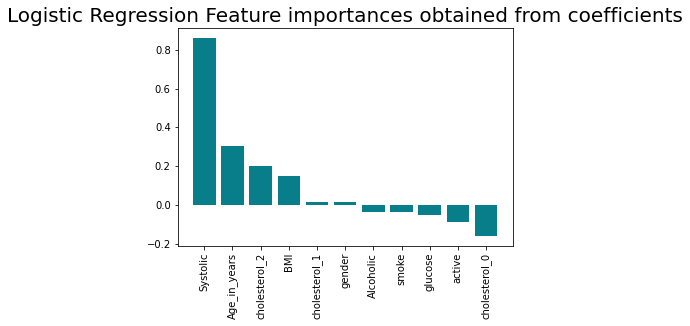

In [ ]:
from sklearn.linear_model import LogisticRegression

model = clf_dict['Logistic Regression']
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Logistic Regression Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


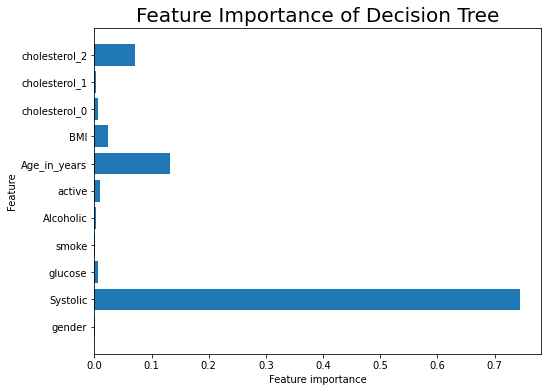

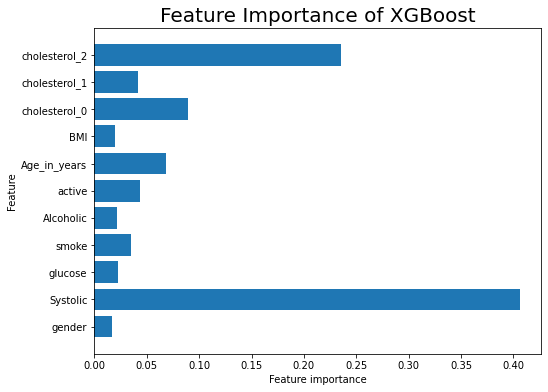

In [ ]:
def plot_feature_importances(model, data,key):
    plt.figure(figsize=(8,6))    
    plt.title('Feature Importance of ' + str(key) ,size=20)
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),labels=data)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(clf_dict['Decision Tree'], X,'Decision Tree')


plot_feature_importances(clf_dict['XGBoost'], X,'XGBoost')


Based on the above analysis of Feature importance of our 3 models we can see that Systolic Blood Pressure is most important feature.  And interesting fact is that Age_in_years and Cholestrol2 (Above normal ) is the second most important  feature. 

# Deployment (5 pts)

How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? 

Our model provided provided a decent score of Accuracy, Precision, Recall, and ROC. However, we'd prefer a higher Percentage across the board for our model. Though not the score/metrics we'd like, it could be useful as 70% of the time we are able to identify patients with Heart Disease. This will lead to cost savings, as an doctor could spend less time running a variety of test to diagnose the disease. In addition, the patient would also save money from not having to undergo that many examinations/test.

*  Accuracy: 73%
*  Precision: 75%
*  Recall: 72%
*  ROC & AUC: 73%

We'd measure the value of our model based on how many cases of Heart Disease we'd be able to detect per patients . This would lead to saving lives, by providing early detection of Heart Disease within a patients. 

Other data that would be good with this dataset is Genetic data, diet, sleep schedule, etc. of the patient. We could correlate those attributes with our class label to determine, even earlier, and more accurately, if a patient has heart disease or not.

For deployment, we'd embed the model within a doctors CRM, that way it could run against patient data and provide some alert to a doctor. Another way could be an application, that's mobile, where patients could do a precheck to determine if they are prone to Heart Disease.



# Exceptional  (10 pts)

*You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?*

As part of our analysis, we did GridSearch in to identify the best Parameters for our models. This helped to improve the Model Metrics we used for our model.

Also, below we displayed the print of the decsion Tree model we used.

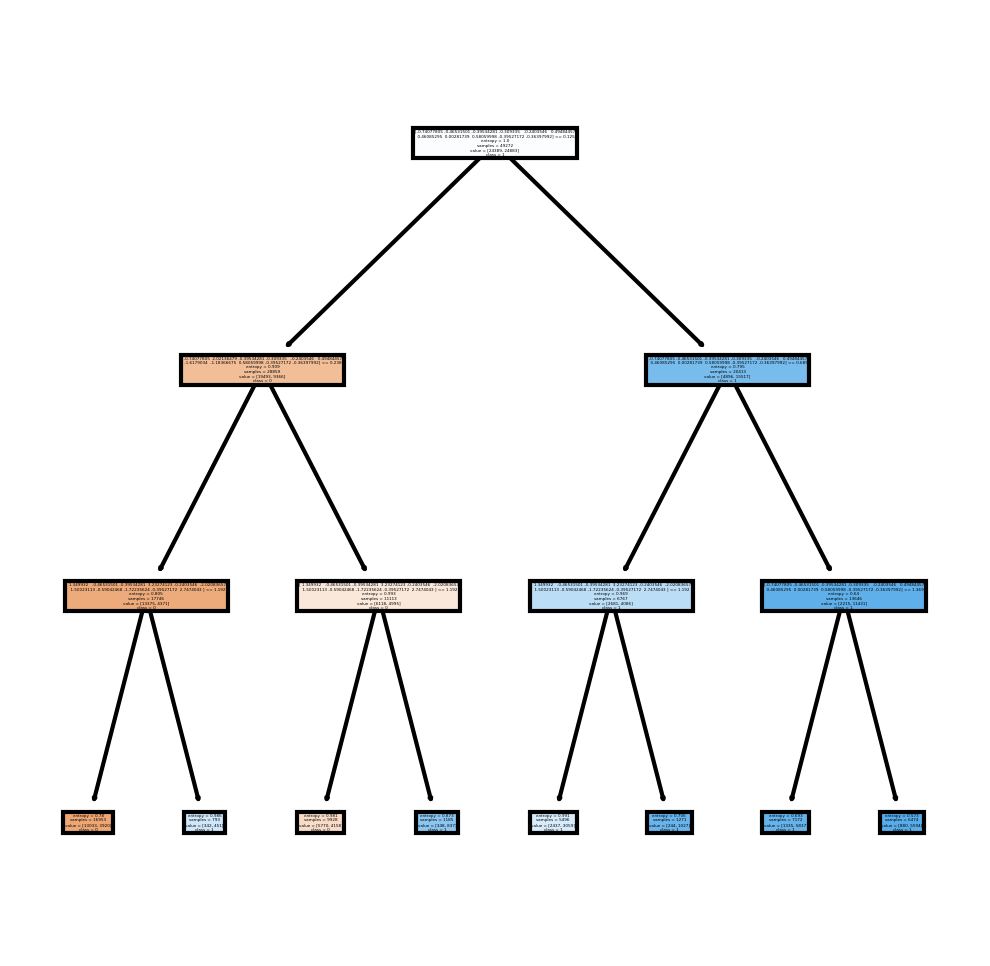

In [ ]:
from sklearn.tree import plot_tree
dtree_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
dtree_en.fit(X_train,y_train)


fn = list(X_train)
cn=['0','1']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
plot_tree(dtree_en,feature_names=fn,class_names=cn,filled=True)
fig.savefig('tree1.png')